In [301]:
import gym
import numpy as np
import math


class MountainCarAgent():
    def __init__(self, buckets=(4, 2), num_episodes=200, min_lr=0.01, min_explore=0.1, discount=0.4, decay=25):
        self.buckets = buckets
        self.num_episodes = num_episodes
        self.min_lr = min_lr
        self.min_explore = min_explore
        self.discount = discount
        self.decay = decay
        self.env = gym.make('MountainCar-v0')
        self.upper_bounds = [self.env.observation_space.high[0], self.env.observation_space.high[1]]
        self.lower_bounds = [self.env.observation_space.low[0], self.env.observation_space.low[1]]
        self.Q_table = np.zeros(self.buckets + (self.env.action_space.n,))
        self.N = np.zeros(self.buckets + (self.env.action_space.n,))

    def get_explore_rate(self, t):
        return max(self.min_explore, min(1., 1. - math.log10((t + 1) / self.decay)))

    def get_lr(self, t):
        return max(self.min_lr, min(1., 1. - math.log10((t + 1) / self.decay)))

    def mc_update(self, current_state, new_state, reward, old_action, action,i):
        q = self.Q_table[current_state][old_action]
        q += (1/i)*(reward - q)
        self.Q_table[current_state][old_action] = q
 
    def sarsa_update(self, current_state, new_state, reward, old_action, action,i):
            q = self.Q_table[current_state][old_action]
            q += self.lr*(reward+self.discount*self.Q_table[new_state][action] - q)
            self.Q_table[current_state][old_action] = q
            
    def ql_update(self, current_state, new_state, reward, old_action, action,i):
            q = self.Q_table[current_state][old_action]
            q += self.lr*(reward+self.discount*np.max(self.Q_table[new_state]) - q)
            self.Q_table[current_state][old_action] = q
        
    def choose_action(self, state):
        x = (np.random.uniform(0, 1))
        if  x < self.explore_rate:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.Q_table[state])
        

    def discretize_state(self, obs):
        discretized = list()
        for i in range(len(obs)):
            scaling = (obs[i] + abs(self.lower_bounds[i])) / (self.upper_bounds[i] - self.lower_bounds[i])
            new_obs = int(np.round((self.buckets[i] - 1) * scaling))
            new_obs = min(self.buckets[i] - 1, max(0, new_obs))
            discretized.append(new_obs)
        return tuple(discretized)

    def train(self, method='mc'):
        losses=[]
        for i, e in enumerate(range(self.num_episodes)):
            i+=1
#             print("Start")/
            total_R=0
            current_state = self.discretize_state(self.env.reset(options={(-0.6,-0.4), 0})[0])
            self.lr = self.get_lr(e)
            self.explore_rate = self.get_explore_rate(e)
            termintated, truncated, position, end = False,False,False,False
            old_action = 1
            steps=0
            while not any([termintated, truncated, position, end]):
                steps+=1
                end = steps==200
                action = self.choose_action(current_state)
                obs, reward, termintated, truncated, _ = self.env.step(action)
                position = obs[0]>=0.5
                new_state = self.discretize_state(obs)
                
                total_R+=reward

                if method == 'mc':
                    self.mc_update(current_state, new_state, total_R, old_action, action,i)
                if method == 'sarsa':
                    self.sarsa_update(current_state, new_state, total_R, old_action, action,i)
                if method == 'ql':
                    self.ql_update(current_state, new_state, total_R, old_action, action,i)
                    
                current_state = new_state
                old_action = action
            losses.append(total_R)
            if position == True:
                print('At episode: ', e, ', Win!!!', sep='')
#             self.mc_update(current_state, new_state, total_R, old_action, action,i)

        print('Finished training!')
        return losses

    def run(self):
       
        self.env = gym.make('MountainCar-v0', render_mode='human')
        current_state = self.discretize_state(self.env.reset(options={(-0.6,-0.4), 0})[0])
        steps=0
        termintated, truncated, position, end = False,False,False,False
        while not any([termintated, truncated, position, end]):
            steps+=1
            end = steps==200
            action = self.choose_action(current_state)
#             print(action)
            obs, reward, termintated, truncated, _ = self.env.step(action)
            position = obs[0]>=0.5
            current_state = self.discretize_state(obs)
        if position == True:
            print('Win!!!')
            
        self.env.close()

In [302]:
agent = MountainCarAgent()
losses = agent.train(method='mc')

At episode: 122, Win!!!
At episode: 123, Win!!!
At episode: 124, Win!!!
At episode: 125, Win!!!
At episode: 126, Win!!!
At episode: 127, Win!!!
At episode: 128, Win!!!
At episode: 130, Win!!!
At episode: 131, Win!!!
At episode: 132, Win!!!
At episode: 133, Win!!!
At episode: 134, Win!!!
At episode: 135, Win!!!
At episode: 136, Win!!!
At episode: 137, Win!!!
At episode: 139, Win!!!
At episode: 140, Win!!!
At episode: 142, Win!!!
At episode: 143, Win!!!
At episode: 144, Win!!!
At episode: 145, Win!!!
At episode: 146, Win!!!
At episode: 147, Win!!!
At episode: 148, Win!!!
At episode: 149, Win!!!
At episode: 150, Win!!!
At episode: 151, Win!!!
At episode: 152, Win!!!
At episode: 153, Win!!!
At episode: 154, Win!!!
At episode: 155, Win!!!
At episode: 156, Win!!!
At episode: 157, Win!!!
At episode: 158, Win!!!
At episode: 159, Win!!!
At episode: 160, Win!!!
At episode: 161, Win!!!
At episode: 162, Win!!!
At episode: 163, Win!!!
At episode: 164, Win!!!
At episode: 165, Win!!!
At episode: 166,

In [303]:
agent.run()

Win!!!


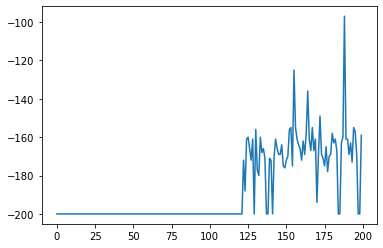

In [304]:
import matplotlib.pyplot as plt

plt.plot(np.arange(200), losses)

In [289]:
agent = MountainCarAgent()
losses = agent.train(method='sarsa')

At episode: 196, Win!!!
At episode: 197, Win!!!
At episode: 198, Win!!!
Finished training!


In [290]:
agent.run()

Win!!!


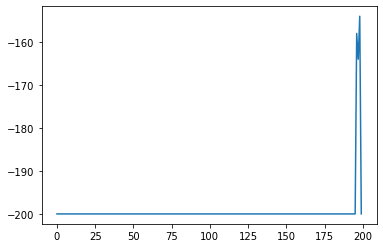

In [291]:
plt.plot(np.arange(200), losses)

In [292]:
agent = MountainCarAgent()
losses = agent.train(method='ql')

At episode: 142, Win!!!
At episode: 157, Win!!!
At episode: 168, Win!!!
At episode: 198, Win!!!
At episode: 199, Win!!!
Finished training!


In [293]:
agent.run()

Win!!!


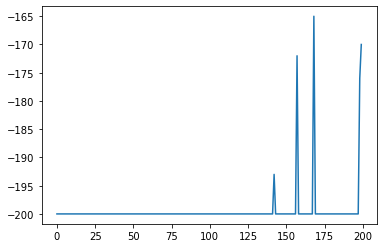

In [294]:
plt.plot(np.arange(200), losses)